<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# CP1. [실습] 데이터 전처리와 시각화: 공항탑승자

- 본 실습은 간단한 데이터 시각화 방법을 직접 체험하기 위한 것입니다.
- 차트를 화려하게 꾸미는데 목적을 두지 말고 전처리 부분에 중점을 두는 것이 좋습니다.
- 우선 다음과 같은 과정으로 데이터 시각화를 수행함으로 알고 진행하기 바랍니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/visualization.png' width="650" align="left">

- 본 실습은 다음과 같은 형태로 전처리하는 과정을 경험합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/practice_10.png' width="1000" align="left">

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

## 1. 데이터 불러오기

- **read_csv()** 함수를 사용해 분석할 데이터를 csv 파일에서 불러옵니다.
- airline_passengers 데이터 셋은 1949 ~ 1960년 국제공항 월 별 탑승객 수를 제공합니다.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/airline_passengers.csv'

In [2]:
# airline_passengers
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airline_passengers.csv'
passengers = pd.read_csv(file_path)

## 2. 데이터 확인

- 데이터를 알아야 데이터를 분석할 수 있습니다.
- 우선 분석할 데이터가 어떤 형태의 데이터인지 확인합니다.

**1) 상위/하위 데이터 확인**

- **head()**, **tail()** 메소드로 상/하위 데이터를 확인합니다.
- 괄호 안에 수를 지정하지 않으면 5가 기본값으로 사용됩니다.

In [3]:
# 상위 5개 행 확인
passengers.head()

,Month,Thousands as Passengers
0,Jan-49,112
1,Feb-49,118
2,Mar-49,132
3,Apr-49,129
4,May-49,121


In [4]:
# 하위 5개 행 확인
passengers.tail()

,Month,Thousands as Passengers
139,Aug-60,606
140,Sep-60,508
141,Oct-60,461
142,Nov-60,390
143,Dec-60,432


**2) 열 데이터 개수, NaN 값 여부 확인**

- **info()** 메소드로 각 열의 값 개수, **NaN**값 포함 여부를 확인합니다.
- NaN값이 포함되어 있으면 결측치에 대한 해결(제거 또는 변경)이 필요합니다.

In [5]:
# 열 정보, NaN 값 포함 여부 확인
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands as Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


**3) 기초 통계 정보 확인**

- **describe()** 메소드를 사용해 기초 통계 정보를 확인합니다.

In [6]:
# 기초 통계 정보 확인
passengers.describe()

,Thousands as Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


**4) 질문**

- passengers 데이터가 분석하기에 적절한 형태인가요?
- passengers 데이터에 대해 어떤 분석이 의미가 있을까요?
- 분석에 걸림돌이 될 만한 것은 무엇일까요?
- 분석을 위해 우선 어떤 처리를 해야 할까요?

## 3. 데이터 전처리  #1

- NaN 값이 포함된 열이 있으면 제거하거나 다른 값으로 채워야 합니다.
- 중복된 데이터는 정확한 분석을 방해하므로 제거해야 합니다.
- 기타 데이터에 방해가 되는 요소를 전처리 과정에서 제거합니다.

**1) 년, 월 분리**
.
- **Jan-49**는 1949년 1월을 의미하니, 이 문자열을 년과 월로 분리해야 합니다.
- **.str.split()** 메소드를 사용하면 특정 구분자를 기준으로 문자열을 분리할 수 있습니다.
- 우선 의도한 대로 분리가 되는지 확인합니다.

In [7]:
# 상위 5개 행 확인
passengers.head()

,Month,Thousands as Passengers
0,Jan-49,112
1,Feb-49,118
2,Mar-49,132
3,Apr-49,129
4,May-49,121


In [8]:
# 월 데이터만 확인해 보기
passengers['Month'].str.split('-').str[0]

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
139    Aug
140    Sep
141    Oct
142    Nov
143    Dec
Name: Month, Length: 144, dtype: object

In [9]:
# 년 데이터만 분리해 보기
passengers['Month'].str.split('-').str[1]

0      49
1      49
2      49
3      49
4      49
       ..
139    60
140    60
141    60
142    60
143    60
Name: Month, Length: 144, dtype: object

- 문자열 분리가 의도대로 수행이 되면 기존 데이터프레임에 열로 추가합니다.
- 데이터프레임은 **없는 열을 변경하면 그 열이 추가됨**을 기억하세요.
- 우선 **월**을 분리해 **mm** 열로 저장합니다.

In [10]:
# MM 열 추가
passengers['mm'] = passengers['Month'].str.split('-').str[0]

# 확인
passengers.head()

,Month,Thousands as Passengers,mm
0,Jan-49,112,Jan
1,Feb-49,118,Feb
2,Mar-49,132,Mar
3,Apr-49,129,Apr
4,May-49,121,May


- 이제 **년**을 분리해 정수로 바꾼 후 1900을 더한 결과를 **yy** 열로 저장합니다.

In [11]:
# yy 열 추가, 정수형으로 바꿔 1900 더하기
passengers['yy'] = passengers['Month'].str.split('-').str[1].astype(int) + 1900

# 확인
passengers.head()

,Month,Thousands as Passengers,mm,yy
0,Jan-49,112,Jan,1949
1,Feb-49,118,Feb,1949
2,Mar-49,132,Mar,1949
3,Apr-49,129,Apr,1949
4,May-49,121,May,1949


- Jan ~ Dec 형식의 월 이름을 1 ~ 12 형식의 숫자로 변환합니다.
- **map()** 메소드를 사용하면 범주형 데이터를 다른 값으로 쉽게 바꿀 수 있습니다.

In [12]:
# 월 이름 확인
passengers['mm'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [13]:
# 월 이름을 숫자로 변경
passengers['mm'] = passengers['mm'].map({'Jan': 1, 'Feb':  2, 'Mar':  3, 'Apr':  4, 
                                         'May': 5, 'Jun':  6, 'Jul':  7, 'Aug':  8, 
                                         'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})

# 확인
passengers.head()

,Month,Thousands as Passengers,mm,yy
0,Jan-49,112,1,1949
1,Feb-49,118,2,1949
2,Mar-49,132,3,1949
3,Apr-49,129,4,1949
4,May-49,121,5,1949


**2) 불필요한 열 제거**

- 분석에 불필요한 열은 과감히 제거합니다.
- 년, 월을 분리해서 별도 열로 가지고 있으니 기존 **Month** 열은 제거합니다.
- 기존 열을 제거하는 **drop()** 메소드 사용 구문을 꼭 기억하세요.

In [14]:
# Month열 제거
passengers.drop(['Month'], axis=1, inplace=True)

# 확인
passengers.head()

,Thousands as Passengers,mm,yy
0,112,1,1949
1,118,2,1949
2,132,3,1949
3,129,4,1949
4,121,5,1949


**3) 열 이름 변경**

- 이후 분석을 위해 열 이름을 쉽게 이해햘 수 있는 이름으로 변경합니다.
- Thousands as Passengers 열 이름을 짧게 **passengers**로 변경합니다.
- 대소문자를 구분하므로 대문자인지 소문자인지 고민하지 않기 위해 **소문자만 사용**하는 것이 좋습니다.
- 열 이름 변경은 **rename()** 메소드를 사용합니다.

In [15]:
# 열 이름 변경
passengers.rename(columns={'Thousands as Passengers': 'passengers'}, inplace=True)

# 확인
passengers.head()

,passengers,mm,yy
0,112,1,1949
1,118,2,1949
2,132,3,1949
3,129,4,1949
4,121,5,1949


- 보기 편하게 열을 yy, mm, passengers 순서로 변경합니다.

In [16]:
# 열 순서를 보기 좋게 변경
passengers = passengers[['yy', 'mm', 'passengers']]

# 확인
passengers

,yy,mm,passengers
0,1949,1,112
1,1949,2,118
2,1949,3,132
3,1949,4,129
4,1949,5,121
...,...,...,...
139,1960,8,606
140,1960,9,508
141,1960,10,461
142,1960,11,390


## 4. 데이터 전처리  #2

- 위 과정에서 충분히 전처리가 진행되었습니다.
- Pivoting 연습을 위해 다른 모습으로 전처리 해봅니다.
- **pivot()**함수를 사용해 yy 열 데이터를, 즉 연도를 열 이름으로 올립니다.

In [17]:
# 연도를 열로 올리기(Pivoting)
passengers = passengers.pivot(index='mm', columns='yy', values='passengers')

# 확인
passengers.head()

yy,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
mm,,,,,,,,,,,,
1,112,115,145,171,196,204,242,284,315,340,360,417
2,118,126,150,180,196,188,233,277,301,318,342,391
3,132,141,178,193,236,235,267,317,356,362,406,419
4,129,135,163,181,235,227,269,313,348,348,396,461
5,121,125,172,183,229,234,270,318,355,363,420,472


- 불필요한 인덱스 이름과 열 이름을 대표하는 이름을 제거합니다.

In [18]:
# 인덱스, 열 대표 이름 제거
passengers.columns.name = None
passengers.index.name = None

# 확인
passengers

,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
1,112,115,145,171,196,204,242,284,315,340,360,417
2,118,126,150,180,196,188,233,277,301,318,342,391
3,132,141,178,193,236,235,267,317,356,362,406,419
4,129,135,163,181,235,227,269,313,348,348,396,461
5,121,125,172,183,229,234,270,318,355,363,420,472
6,135,149,178,218,243,264,315,374,422,435,472,535
7,148,170,199,230,264,302,364,413,465,491,548,622
8,148,170,199,242,272,293,347,405,467,505,559,606
9,136,158,184,209,237,259,312,355,404,404,463,508
10,119,133,162,191,211,229,274,306,347,359,407,461


## 5. [옵션] 데이터 시각화

- 이제 전처리가 진행된 데이터를 시각화해서 분석합니다.
- 본 실습에서는 간단한 Line Graph를 표시해 보는 것을 목표로 합니다.

**1) 1960년 월별 승객 수 변화**

- 1960년 승객 변황을 표시해 봅니다.

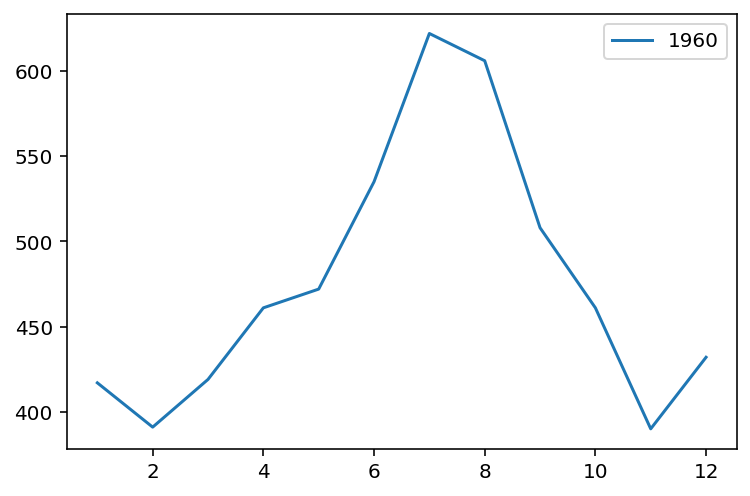

In [19]:
# 1960년 월별 승객 수 변화
passengers.plot(kind='line', y=1960)
plt.show()

**2) 1959, 1960년 월별 승객 수 변화 비교**

- 1959년, 1960년 데이터를 같이 분석해 봅니다.

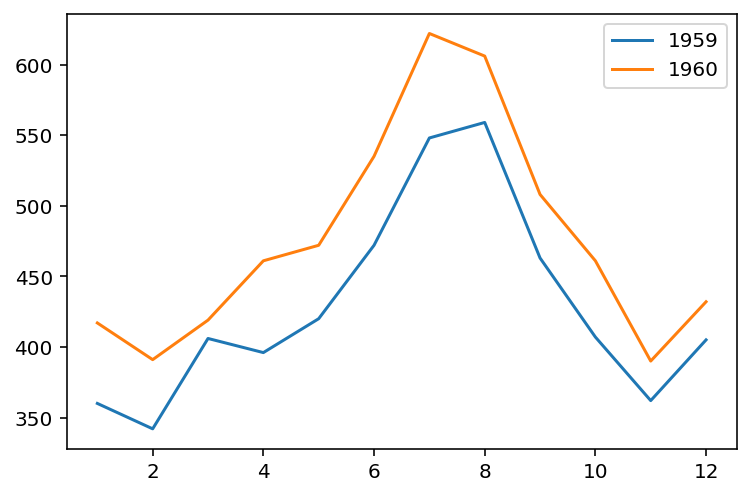

In [20]:
# 1959, 1960년 월별 승객 수 변화
passengers.plot(kind='line', y=[1959, 1960])
plt.show()

**3) 1956 ~ 1960년 월별 승객 수 변화 비교**

- 1956 ~ 1960년 데이터를 같이 분석해 봅니다.

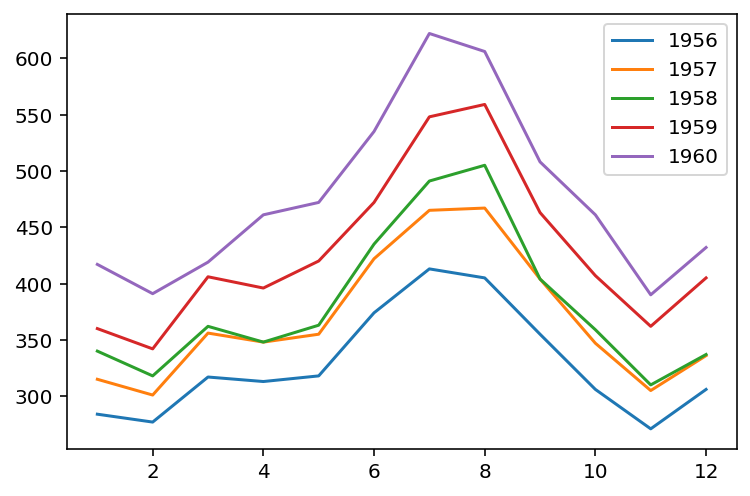

In [21]:
# 1956 ~ 1960년 월별 승객 수 변화
passengers.plot(kind='line', y=range(1956, 1961))
plt.show()

- 선 그래프를 조금만 꾸며봅니다.

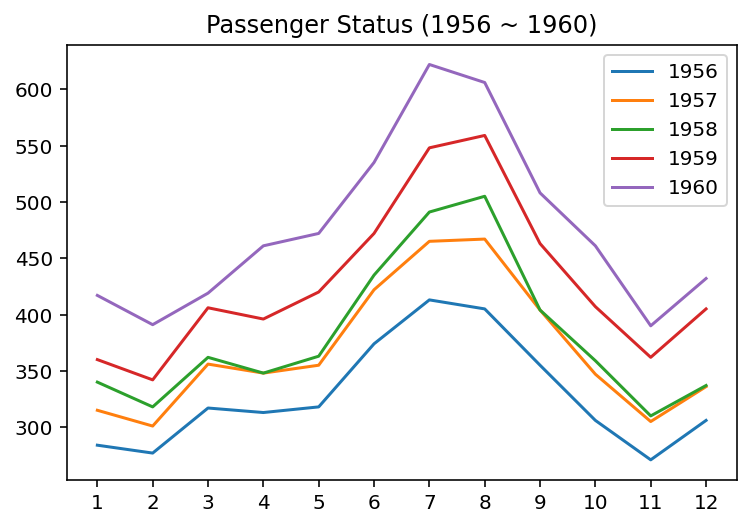

In [22]:
# 1956 ~ 1960년 월별 승객 수 변화
passengers.plot(kind='line', y=range(1956, 1961))
plt.title('Passenger Status (1956 ~ 1960)')
plt.xticks(np.arange(1, 13, step=1))
plt.show()

## 6. 의미 찾기

- 단순히 데이터 전처리 과정과 시각화 과정을 경험한 것이므로 분석 결과에 대해 큰 의미를 두지 않아도 됩니다.
- 주위에서 위 형태와 같은 데이터를 찾아 위 과정으로 분석해 보면 유익할 것입니다.

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=300/></center>